In [2]:
import pandas as pd

salary = pd.read_csv('Salary_Data.csv')
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
salary = salary.dropna()

In [6]:
import numpy as np

X = np.array(salary['Years of Experience'])
y = np.array(salary['Salary'])

X = X.reshape(len(salary), 1)
y = y.ravel()

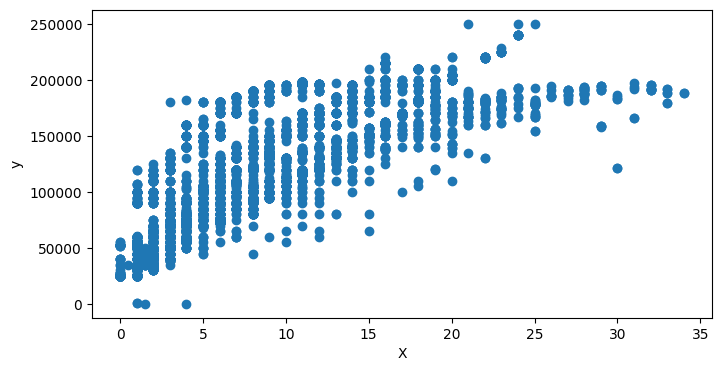

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 4))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression, SGDRegressor

model_1 = LinearRegression()
model_2 = SGDRegressor()

model_1.fit(X_train_scaled, y_train)
model_2.fit(X_train_scaled, y_train)

linear_pred = model_1.predict(X_test_scaled)
sgd_pred = model_2.predict(X_test_scaled)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_mae = mean_absolute_error(linear_pred, y_test)
linear_mse = mean_squared_error(linear_pred, y_test)
linear_r2 = r2_score(linear_pred, y_test)

sgd_mae = mean_absolute_error(sgd_pred, y_test)
sgd_mse = mean_squared_error(sgd_pred, y_test)
sgd_r2 = r2_score(sgd_pred, y_test)

print("MAE - LinearRegression: {0:0.4f}, SGDRegressor: {1:0.4f}".format(linear_mae, sgd_mae))
print("RMSE - LinearRegression: {0:0.4f}, SGDRegressor: {1:0.4f}".format(np.sqrt(linear_mse), np.sqrt(sgd_mse)))
print("R2 - LinearRegression: {0:0.4f}, SGDRegressor: {1:0.4f}".format(linear_r2, sgd_r2))


MAE - LinearRegression: 25118.2986, SGDRegressor: 25140.1404
RMSE - LinearRegression: 30978.5667, SGDRegressor: 30973.0579
R2 - LinearRegression: 0.4938, SGDRegressor: 0.4842


In [14]:
# 연습문제

# =========================
# 1. 라이브러리 임포트
# =========================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================
# 2. 데이터 로드
# =========================
df = pd.read_csv("boston.csv")

# 입력 변수(RM), 타깃 변수(PRICE)
X = df[["RM"]]          # 2차원 유지
y = df["PRICE"]

# =========================
# 3. 학습 / 테스트 분리
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 4. LinearRegression
# =========================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)

# =========================
# 5. SGDRegressor (스케일링 필수)
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_model = SGDRegressor(
    max_iter=10000,
    tol=1e-4,
    random_state=42
)

sgd_model.fit(X_train_scaled, y_train)
sgd_pred = sgd_model.predict(X_test_scaled)

# =========================
# 6. 성능 평가
# =========================
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)

sgd_mae = mean_absolute_error(y_test, sgd_pred)
sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_pred))
sgd_r2 = r2_score(y_test, sgd_pred)

# =========================
# 7. 결과 출력
# =========================
print("===== LinearRegression =====")
print(f"MAE  : {linear_mae:.4f}")
print(f"RMSE : {linear_rmse:.4f}")
print(f"R2   : {linear_r2:.4f}\n")

print("===== SGDRegressor =====")
print(f"MAE  : {sgd_mae:.4f}")
print(f"RMSE : {sgd_rmse:.4f}")
print(f"R2   : {sgd_r2:.4f}\n")

# =========================
# 8. 더 좋은 모델 판단 (RMSE 기준 )
# =========================
if linear_rmse < sgd_rmse:
    print("👉 LinearRegression 모델이 더 좋은 성능을 보입니다.")
else:
    print("👉 SGDRegressor 모델이 더 좋은 성능을 보입니다.")


===== LinearRegression =====
MAE  : 4.4783
RMSE : 6.7930
R2   : 0.3708

===== SGDRegressor =====
MAE  : 4.4786
RMSE : 6.7940
R2   : 0.3706

👉 LinearRegression 모델이 더 좋은 성능을 보입니다.
